# **Data Processing**


*   scaling data (2018,2019,2020,2021,2022)
*   combining
*   2023 data (for testing)



# **1. Common Columns for Consistency + Scaling**

In [32]:
import pandas as pd

# Load the datasets
data_files = {
    2018: 'Combined - 2018.csv',
    2019: 'Combined - 2019.csv',
    2020: 'Combined - 2020.csv',
    2021: 'Combined - 2021.csv',
    2022: 'Combined - 2022.csv',
    2023: 'Combined - 2023.csv'
}

dataframes = {}

for year, file in data_files.items():
    dataframes[year] = pd.read_csv(file)

# Rename columns for each dataset
for year, df in dataframes.items():
    if year in [2018, 2019]:
        df.rename(columns={
            'Country or region': 'country_name',
            'Score': 'life_ladder',
            'Social support': 'social_support',
            'Healthy life expectancy': 'healthy_life_expectancy_at_birth',
            'Freedom to make life choices': 'freedom_to_make_life_choices',
            'Generosity': 'generosity',
            'Perceptions of corruption': 'corruption'
        }, inplace=True)
    elif year in [2020, 2021]:
        df.rename(columns={
            'Country name': 'country_name',
            'Ladder score': 'life_ladder',
            'Social support': 'social_support',
            'Healthy life expectancy': 'healthy_life_expectancy_at_birth',
            'Freedom to make life choices': 'freedom_to_make_life_choices',
            'Generosity': 'generosity',
            'Perceptions of corruption': 'corruption'
        }, inplace=True)
    elif year == 2022:
        df.rename(columns={
            'country': 'country_name',
            'happiness_score': 'life_ladder',
            'social_support': 'social_support',
            'healthy_life_expectancy': 'healthy_life_expectancy_at_birth',
            'freedom_to_make_life_choices': 'freedom_to_make_life_choices',
            'generosity': 'generosity',
            'perceptions_of_corruption': 'corruption'
        }, inplace=True)
    elif year == 2023:
        df.rename(columns={
            'Country name': 'country_name',
            'Ladder score': 'life_ladder',
            'Social support': 'social_support',
            'Healthy life expectancy': 'healthy_life_expectancy_at_birth',
            'Freedom to make life choices': 'freedom_to_make_life_choices',
            'Generosity': 'generosity',
            'Perceptions of corruption': 'corruption'
        }, inplace=True)

# Define common columns
common_columns = [
    'country_name', 'life_ladder', 'log_gdp_per_capita',
    'social_support', 'healthy_life_expectancy_at_birth',
    'freedom_to_make_life_choices', 'generosity', 'corruption'
]

# Filter each dataset to include only the common columns
processed_dataframes = {}

for year, df in dataframes.items():
    # Get the columns that are actually present in the DataFrame
    available_columns = list(set(df.columns) & set(common_columns))

    # Select only the available common columns
    processed_dataframes[year] = df[available_columns]

# Display column names to ensure consistency
for year, df in processed_dataframes.items():
    print(f"Columns for {year} dataset:")
    print(df.columns.tolist())
    print("\n")

# Display the first few rows of each processed dataset
for year, df in processed_dataframes.items():
    print(f"Dataset for {year}:")
    print(df.head())
    print("\n")


Columns for 2018 dataset:
['social_support', 'generosity', 'country_name', 'corruption', 'life_ladder', 'freedom_to_make_life_choices', 'healthy_life_expectancy_at_birth']


Columns for 2019 dataset:
['social_support', 'generosity', 'country_name', 'corruption', 'life_ladder', 'freedom_to_make_life_choices', 'healthy_life_expectancy_at_birth']


Columns for 2020 dataset:
['social_support', 'generosity', 'country_name', 'corruption', 'life_ladder', 'freedom_to_make_life_choices', 'healthy_life_expectancy_at_birth']


Columns for 2021 dataset:
['social_support', 'generosity', 'country_name', 'corruption', 'life_ladder', 'freedom_to_make_life_choices', 'healthy_life_expectancy_at_birth']


Columns for 2022 dataset:
['social_support', 'generosity', 'country_name', 'corruption', 'life_ladder', 'freedom_to_make_life_choices', 'healthy_life_expectancy_at_birth']


Columns for 2023 dataset:
['social_support', 'generosity', 'country_name', 'corruption', 'life_ladder', 'freedom_to_make_life_choi

In [33]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Process and standardize each dataset
def process_dataset(df, year):
    """Standardize column names and scale GDP and life expectancy values consistently."""
    df.rename(columns=lambda col: 'life_ladder' if 'Score' in col or 'Ladder score' in col else col, inplace=True)

    # Ensure that 'Score' and 'Ladder score' columns are renamed to 'life_ladder'
    df.rename(columns=lambda col: 'life_ladder' if 'Score' in col or 'Ladder score' in col else col, inplace=True)

    df = df.loc[:, ~df.columns.duplicated()]  # Remove duplicate columns
    df['year'] = year

    # Normalize healthy life expectancy to 0-1 range
    if 'healthy_life_expectancy_at_birth' in df.columns:
        scaler = MinMaxScaler(feature_range=(0, 1))
        df['normalized_healthy_life_expectancy'] = scaler.fit_transform(
            df['healthy_life_expectancy_at_birth'].values.reshape(-1, 1)
        )

    return df

# Process all datasets
processed_dataframes = {}

for year, df in dataframes.items():
    processed_dataframes[year] = process_dataset(df, year)

# Display the first few rows of the finalized datasets
for year, df in processed_dataframes.items():
    print(f"Finalized Dataset for {year}:")
    print(df.head())  # Display relevant columns for validation
    print("\n")

# Print the columns for each year's dataset
for year, df in processed_dataframes.items():
    print(f"Columns for {year} dataset:")
    print(df.columns.tolist())
    print("\n")


Finalized Dataset for 2018:
   Overall rank country_name  life_ladder  GDP per capita  \
0             1      Finland        7.632           1.305   
1             2       Norway        7.594           1.456   
2             3      Denmark        7.555           1.351   
3             4      Iceland        7.495           1.343   
4             5  Switzerland        7.487           1.420   

   normalized_gdp_per_capita  social_support  \
0                   0.622615           1.592   
1                   0.694656           1.582   
2                   0.644561           1.590   
3                   0.640744           1.644   
4                   0.677481           1.549   

   healthy_life_expectancy_at_birth  freedom_to_make_life_choices  generosity  \
0                             0.874                         0.681       0.202   
1                             0.861                         0.686       0.286   
2                             0.868                         0.683       0

# **2. Drop Countries that doesn't exist in every dataset**

In [34]:
# Find countries present in all datasets
common_countries = set(processed_dataframes[2018]['country_name'])

# Intersect common countries with all years
for year in data_files.keys():
    # Check if 'country_name' column exists before accessing it
    if 'country_name' in processed_dataframes[year].columns:
        common_countries &= set(processed_dataframes[year]['country_name'])
    else:
        print(f"Warning: 'country_name' column not found in dataset for year {year}. Skipping this year for common country calculation.")

# Filter datasets to include only common countries
for year in data_files.keys():
    # Check if 'country_name' column exists before filtering
    if 'country_name' in processed_dataframes[year].columns:
        processed_dataframes[year] = processed_dataframes[year][processed_dataframes[year]['country_name'].isin(common_countries)]
    #else:
        #print(f"Warning: 'country_name' column not found in dataset for year {year}. Skipping filtering for this year.")

# Verify results
for year, df in processed_dataframes.items():
    print(f"After filtering, {year} dataset has {len(df)} rows.")


After filtering, 2018 dataset has 127 rows.
After filtering, 2019 dataset has 127 rows.
After filtering, 2020 dataset has 127 rows.
After filtering, 2021 dataset has 127 rows.
After filtering, 2022 dataset has 127 rows.
After filtering, 2023 dataset has 127 rows.


# **3. Drop the columns that is irrelevant**

In [35]:
import pandas as pd

# List of columns to drop
columns_to_drop = [
    'Overall rank', 'GDP per capita', 'Logged GDP per capita','unlogged_gdp_per_capita', 'Regional indicator',
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'log_gdp_per_capita', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual',
    'region', 'perceptions_of_corruption', 'healthy_life_expectancy', 'healthy_life_expectancy_at_birth', 'happiness_score'
]

# Filter datasets to include only common countries and drop specified columns
for year in data_files.keys():
    processed_dataframes[year] = processed_dataframes[year].drop(columns=columns_to_drop, errors='ignore')

# Verify results
for year, df in processed_dataframes.items():
    print(f"Columns for {year} dataset after filtering:")
    print(df.columns.tolist())
    print("\n")
    print(f"After filtering, {year} dataset has {len(df)} rows.")



Columns for 2018 dataset after filtering:
['country_name', 'life_ladder', 'normalized_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'corruption', 'year', 'normalized_healthy_life_expectancy']


After filtering, 2018 dataset has 127 rows.
Columns for 2019 dataset after filtering:
['country_name', 'life_ladder', 'normalized_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'corruption', 'year', 'normalized_healthy_life_expectancy']


After filtering, 2019 dataset has 127 rows.
Columns for 2020 dataset after filtering:
['country_name', 'life_ladder', 'normalized_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'corruption', 'year', 'normalized_healthy_life_expectancy']


After filtering, 2020 dataset has 127 rows.
Columns for 2021 dataset after filtering:
['country_name', 'life_ladder', 'normalized_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'corruption', 

In [36]:
# Save the processed 2023 dataset to a new CSV file
processed_2023_df = processed_dataframes[2023]

# Save to a new CSV file
processed_2023_df.to_csv('processed_2023.csv', index=False)

# Display a confirmation message
print("Processed 2023 dataset has been saved as 'processed_2023.csv'.")


Processed 2023 dataset has been saved as 'processed_2023.csv'.


# **4. Combining all datasets (2018-2022)**

In [37]:
# Combine datasets for 2018–2022
combined_data_2018_2022 = pd.concat(
    [processed_dataframes[year] for year in range(2018, 2023)],
    ignore_index=True
)

# Verify the combined dataset
print(f"Combined dataset shape: {combined_data_2018_2022.shape}")
print(f"Columns in the combined dataset: {combined_data_2018_2022.columns.tolist()}")

Combined dataset shape: (635, 9)
Columns in the combined dataset: ['country_name', 'life_ladder', 'normalized_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'corruption', 'year', 'normalized_healthy_life_expectancy']


In [38]:
# Save the combined data as a CSV file
combined_data_2018_2022.to_csv('combined_data_2018_2022.csv', index=False)

print("Data saved as 'combined_data_2018_2022.csv'.")


Data saved as 'combined_data_2018_2022.csv'.


In [39]:
combined_data_2018_2022.describe()

,life_ladder,normalized_gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,corruption,year,normalized_healthy_life_expectancy
count,635.000000,635.000000,635.000000,635.000000,635.000000,634.000000,635.000000,635.000000
mean,5.583463,0.557025,1.006324,0.601660,0.097224,0.367430,2020.000000,0.623959
std,1.075352,0.218705,0.296186,0.211471,0.149250,0.330743,1.415328,0.210641
min,2.404000,0.000000,0.000000,0.000000,-0.300907,0.000000,2018.000000,0.000000
25%,4.743650,0.401511,0.810500,0.455000,0.017917,0.077000,2019.000000,0.476401
50%,5.653000,0.572657,0.932000,0.594000,0.111000,0.192500,2020.000000,0.664548
75%,6.321500,0.732250,1.224500,0.766760,0.191299,0.745529,2021.000000,0.773791
max,7.842000,1.000000,1.644000,0.974998,0.598000,0.939000,2022.000000,1.000000


# **Preliminary Visualizations**

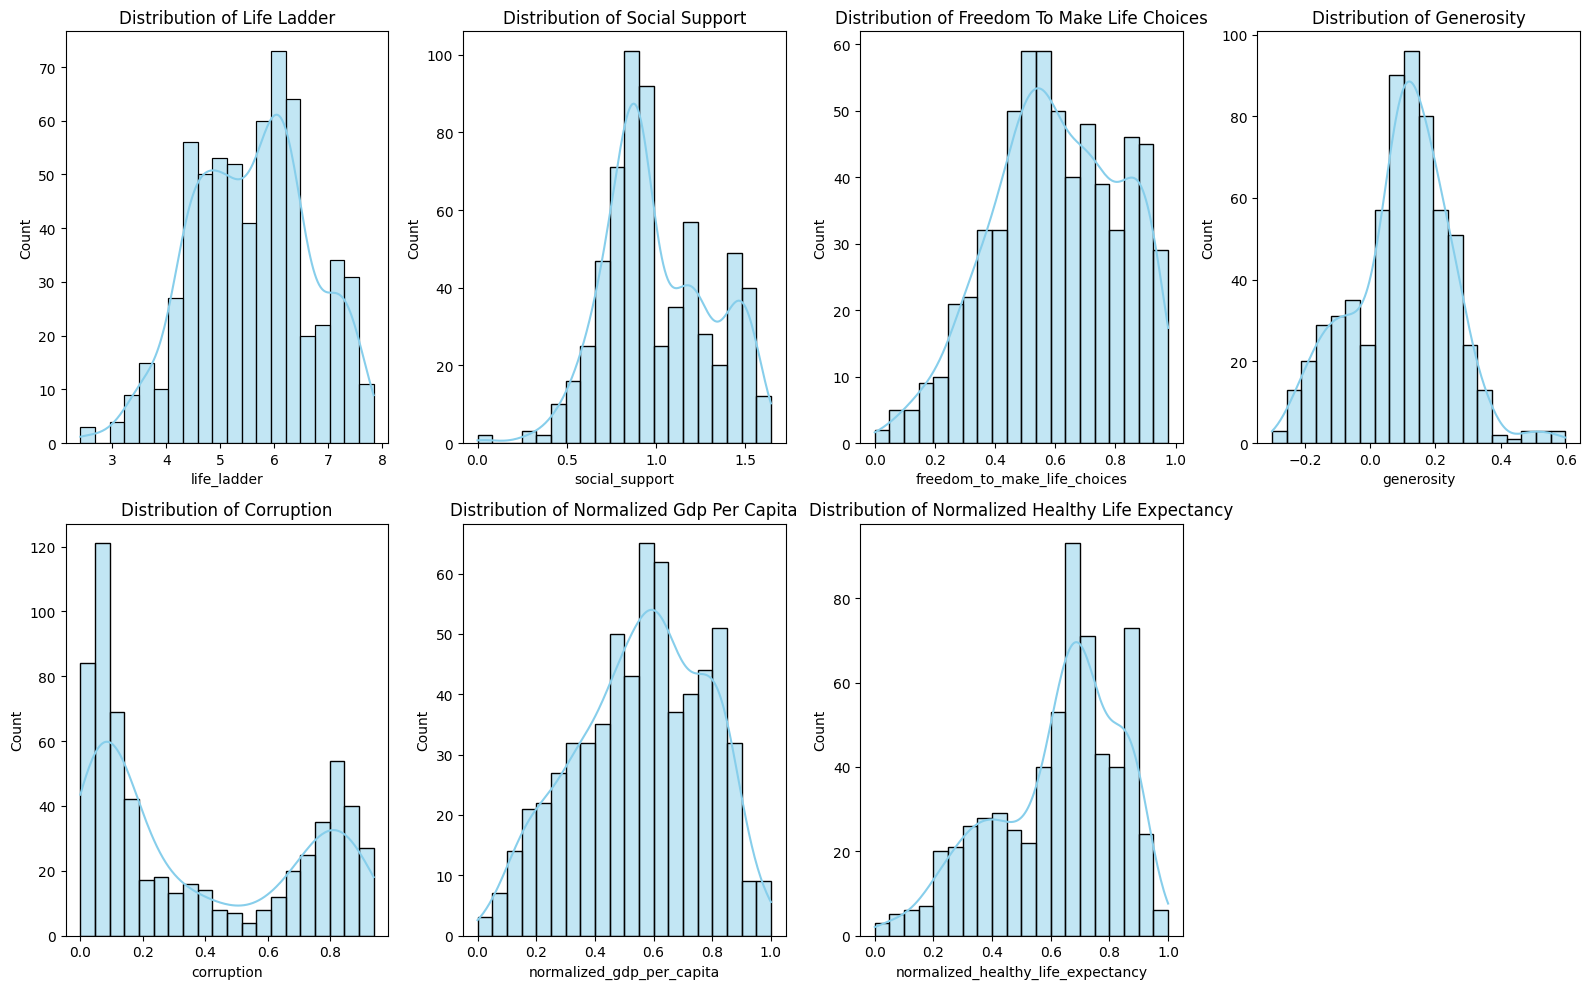

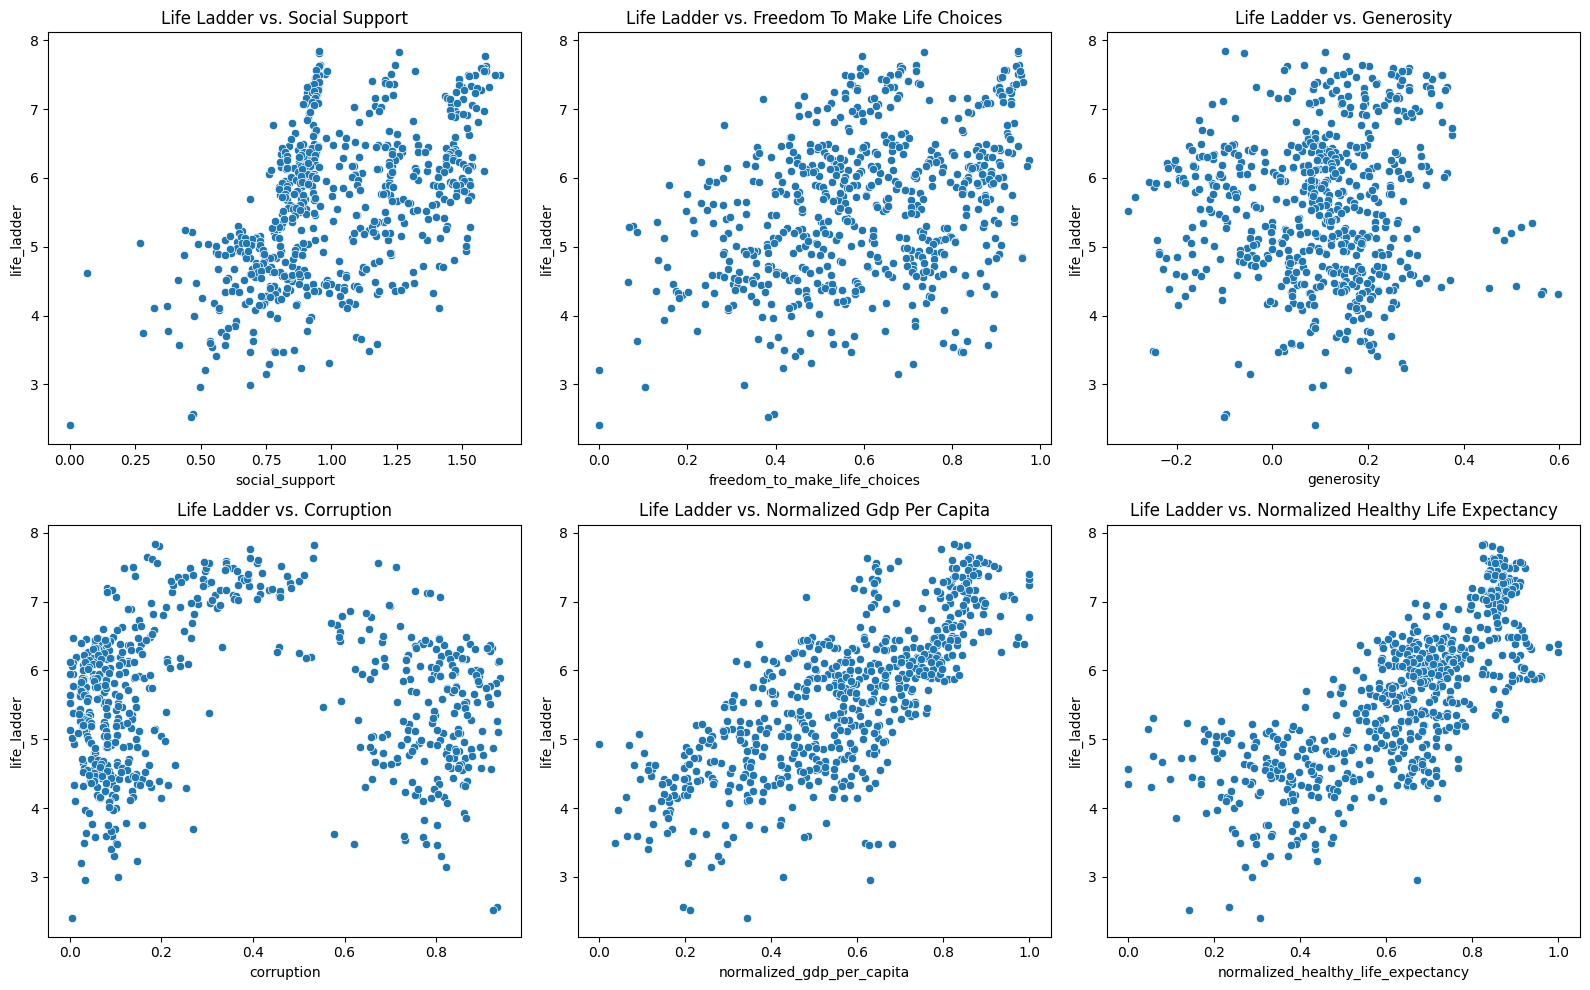

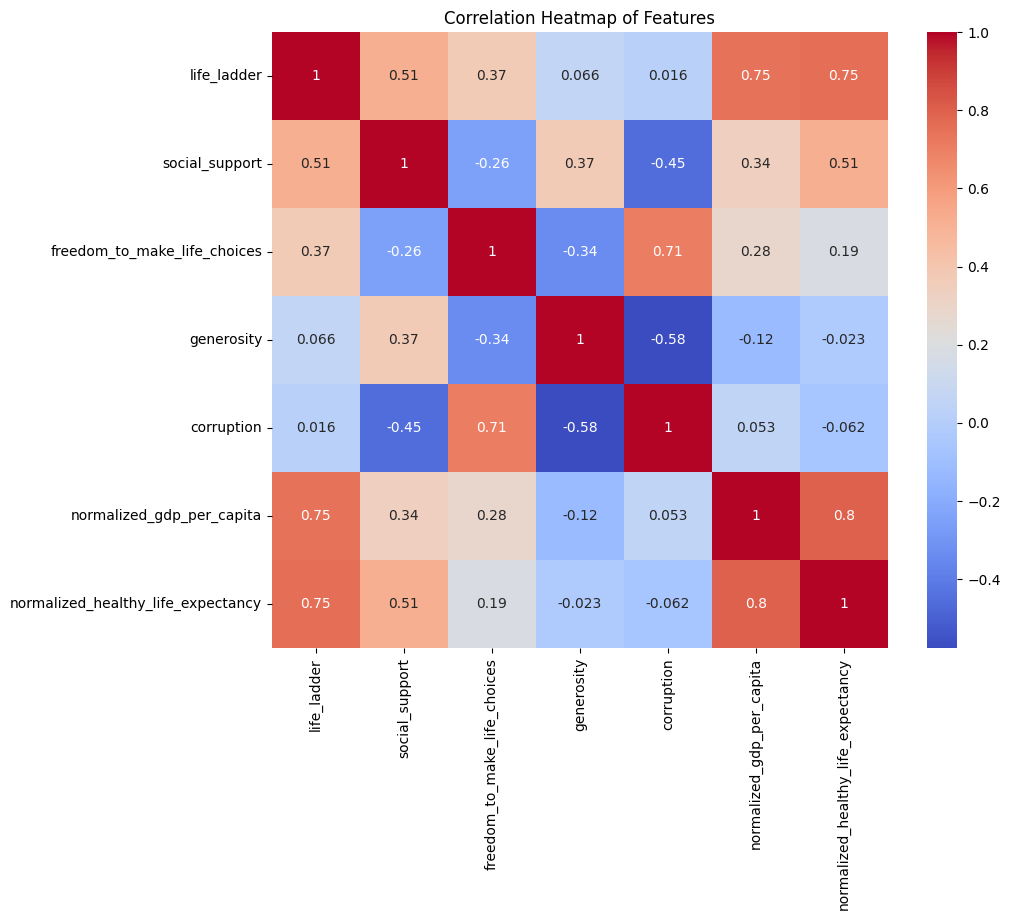

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['life_ladder', 'social_support', 'freedom_to_make_life_choices',
            'generosity', 'corruption', 'normalized_gdp_per_capita',
            'normalized_healthy_life_expectancy'
]


# Check if all features are present in the DataFrame
for feature in features:
    if feature not in combined_data_2018_2022.columns:
        print(f"Warning: Feature '{feature}' not found in the DataFrame.")
        # Handle the missing feature, e.g., remove it from the features list,
        # impute values, or skip visualization for this feature.
        features.remove(feature)  # Remove the missing feature from the list

# Distribution plots for key features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):  # Use the updated features list
    plt.subplot(2, 4, i)  # 2 rows and 4 columns grid for distribution plots
    sns.histplot(combined_data_2018_2022[feature], kde=True, color='skyblue', bins=20)  # Adjust bins for better visualization
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.tight_layout()

plt.show()

# Scatter plots for relationships with life_ladder
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features[1:], 1):  # Skip 'life_ladder' itself
    plt.subplot(2, 3, i)
    sns.scatterplot(data=combined_data_2018_2022, x=feature, y='life_ladder')
    plt.title(f'Life Ladder vs. {feature.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = combined_data_2018_2022[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()



# **Random Forest**

In [41]:
print(combined_data_2018_2022.columns.tolist())
print(processed_dataframes[2023].columns.tolist())

['country_name', 'life_ladder', 'normalized_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'corruption', 'year', 'normalized_healthy_life_expectancy']
['country_name', 'life_ladder', 'normalized_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'corruption', 'year', 'normalized_healthy_life_expectancy']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.4758
Mean Squared Error (MSE): 0.4161
Root Mean Squared Error (RMSE): 0.6451
R-squared (R2): 0.6724
Cross-validated MSE scores: 0.2262 ± 0.0640


<ipython-input-43-fe07b5138667>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


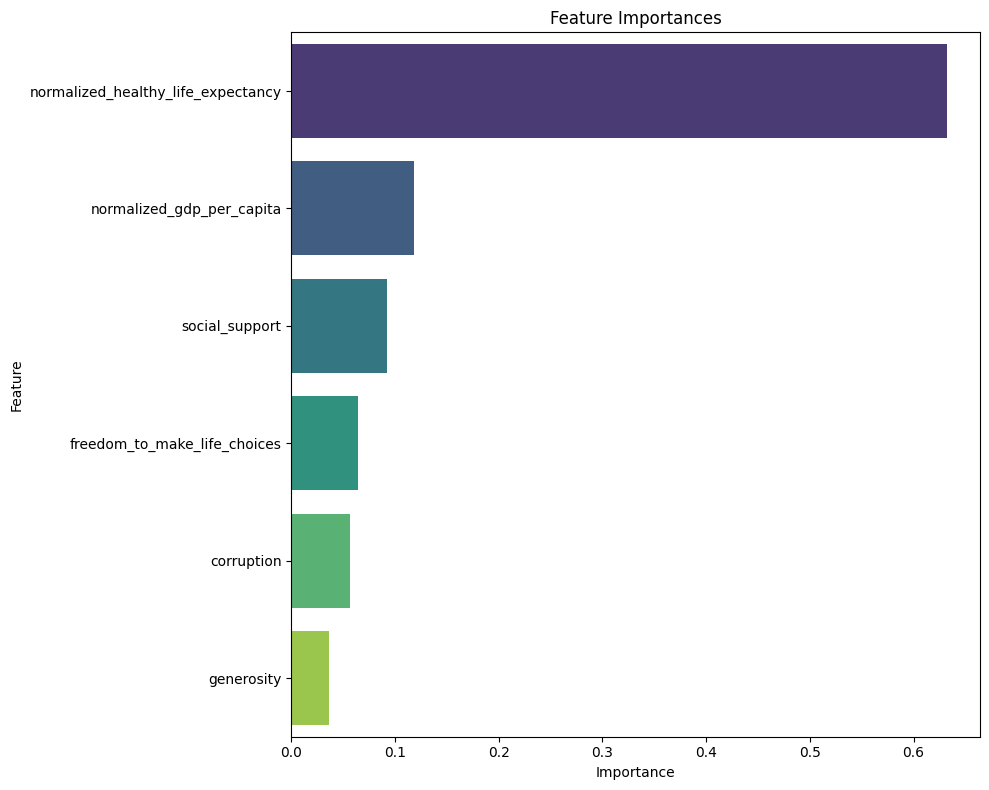

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `processed_dataframes` contains the processed datasets for each year

# Combine 2018–2022 datasets
combined_data_2018_2022 = pd.concat(
    [processed_dataframes[year] for year in range(2018, 2023)], ignore_index=True
)

# Normalize GDP and healthy life expectancy (create new columns)
for df in [combined_data_2018_2022, processed_dataframes[2023]]:
    if 'log_gdp_per_capita' in df.columns:
        df['normalized_gdp_per_capita'] = (df['log_gdp_per_capita'] - df['log_gdp_per_capita'].mean()) / df['log_gdp_per_capita'].std()
    if 'healthy_life_expectancy_at_birth' in df.columns:
        df['normalized_healthy_life_expectancy'] = (df['healthy_life_expectancy_at_birth'] - df['healthy_life_expectancy_at_birth'].mean()) / df['healthy_life_expectancy_at_birth'].std()

# Features to drop (check if they exist before dropping)
columns_to_drop = [
    'Overall rank', 'GDP per capita', 'Logged GDP per capita','unlogged_gdp_per_capita', 'Regional indicator',
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'log_gdp_per_capita', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual',
    'region', 'perceptions_of_corruption', 'healthy_life_expectancy', 'healthy_life_expectancy_at_birth', 'happiness_score'
]

combined_data_2018_2022.drop(columns=[col for col in columns_to_drop if col in combined_data_2018_2022.columns], inplace=True)
processed_dataframes[2023].drop(columns=[col for col in columns_to_drop if col in processed_dataframes[2023].columns], inplace=True)

# Define features (X) and target (y)
features = [
    'social_support', 'freedom_to_make_life_choices', 'generosity',
    'corruption', 'normalized_gdp_per_capita', 'normalized_healthy_life_expectancy'
]
target = 'life_ladder'

# Ensure features exist in both datasets
X_train = combined_data_2018_2022[features].dropna()
y_train = combined_data_2018_2022[target].loc[X_train.index]
X_test = processed_dataframes[2023][features].dropna()
y_test = processed_dataframes[2023][target].loc[X_test.index]

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the 2023 test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE scores: {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Feature Importance Analysis
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()



In [44]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (634, 6) (634,)
Testing data shape: (127, 6) (127,)


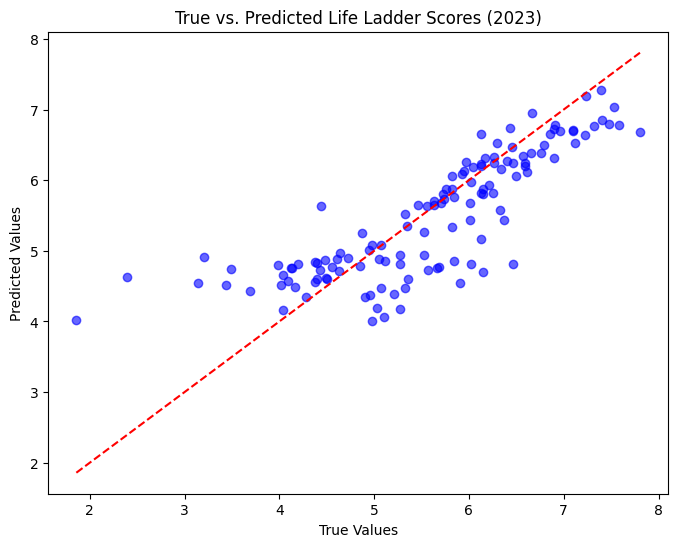

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Life Ladder Scores (2023)")
plt.show()


In [46]:
print("Feature Importances:\n", feature_importance)

Feature Importances:
                               Feature  Importance
5  normalized_healthy_life_expectancy    0.632435
4           normalized_gdp_per_capita    0.118194
0                      social_support    0.092345
1        freedom_to_make_life_choices    0.063769
3                          corruption    0.056537
2                          generosity    0.036720


In [47]:
results = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_pred
})
results.head()

,True Values,Predicted Values
0,7.804,6.675815
1,7.586,6.783270
2,7.530,7.036705
3,7.473,6.801972
4,7.403,6.847176


# **Other models**

In [48]:
X_train = combined_data_2018_2022[features].dropna()
y_train = combined_data_2018_2022[target].loc[X_train.index]
X_test = processed_dataframes[2023][features].dropna()
y_test = processed_dataframes[2023][target].loc[X_test.index]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:10:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Gradient Boosting Performance ---
Mean Absolute Error (MAE): 0.4336
Mean Squared Error (MSE): 0.3431
Root Mean Squared Error (RMSE): 0.5857
R-squared (R2): 0.7299
--- XGBoost Performance ---
Mean Absolute Error (MAE): 0.4480
Mean Squared Error (MSE): 0.3524
Root Mean Squared Error (RMSE): 0.5936
R-squared (R2): 0.7226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 634, number of used features: 6
[LightGBM] [Info] Start training from score 5.581585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-49-cfae12264050>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=results_df, palette="coolwarm")


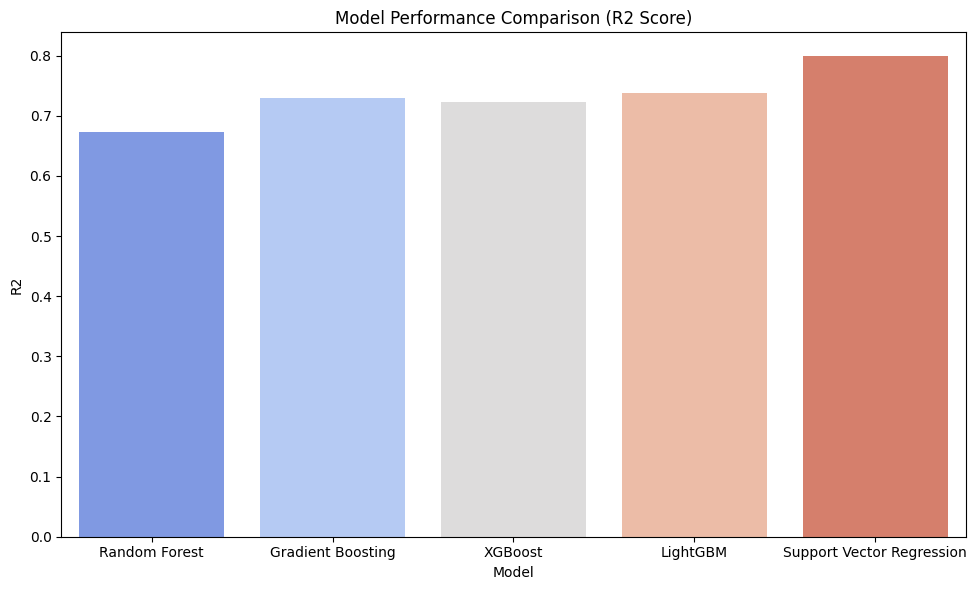

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Function to evaluate and compare models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Evaluate Random Forest (already trained above)
results = [
    {"Model": "Random Forest", "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}
]

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
results.append(evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting"))

# XGBoost
xgb_model = XGBRegressor(random_state=42, use_label_encoder=False, eval_metric="rmse")
results.append(evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost"))

# LightGBM
lgbm_model = LGBMRegressor(random_state=42)
results.append(evaluate_model(lgbm_model, X_train, y_train, X_test, y_test, "LightGBM"))

# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')
results.append(evaluate_model(svr_model, X_train, y_train, X_test, y_test, "Support Vector Regression"))

# Summarize results
results_df = pd.DataFrame(results)

# Visualize comparison of models
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2", data=results_df, palette="coolwarm")
plt.title("Model Performance Comparison (R2 Score)")
plt.tight_layout()
plt.show()


# **Hyperparameter Tuning for SVR**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define parameter grid for SVR
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_svr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


# **Feature Importance Using Gradient Boosting**

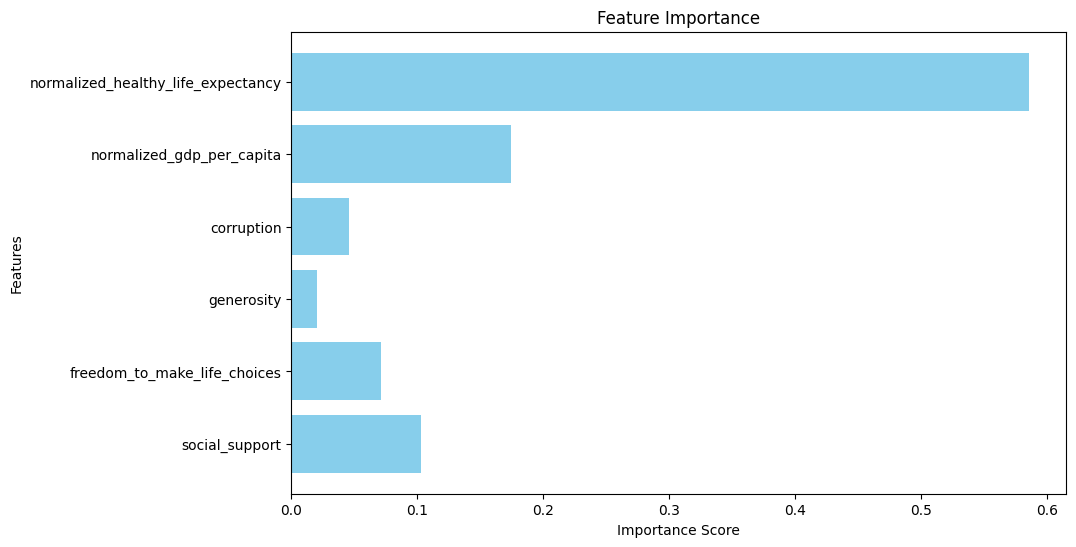

Feature Importances:
                               Feature  Importance
5  normalized_healthy_life_expectancy    0.632435
4           normalized_gdp_per_capita    0.118194
0                      social_support    0.092345
1        freedom_to_make_life_choices    0.063769
3                          corruption    0.056537
2                          generosity    0.036720


In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Fit Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Get feature importance
importance = gbr.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("Feature Importances:\n", feature_importance)

# **Dimensionality Reduction with PCA**

R2 Score after PCA + SVR: 0.8032856757007967


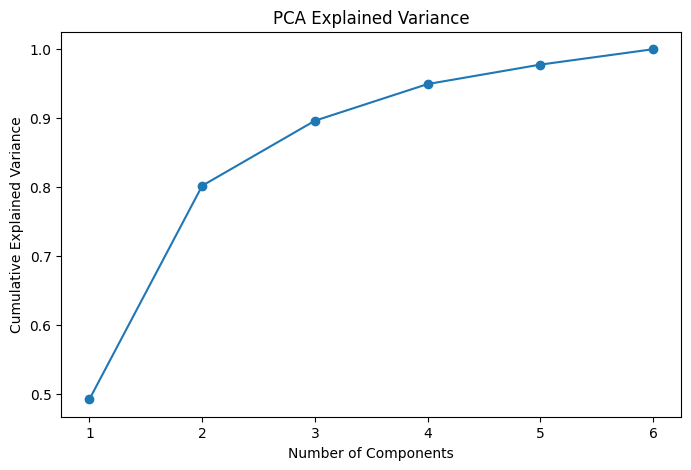

Optimal number of components: 5


In [52]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split

# Create pipeline for PCA and SVR
pca_svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=min(6, X_train.shape[1]))),
    ('svr', SVR(kernel='rbf', C=1, gamma='scale'))
])

# Split data into training and validation sets
X_train_pca, X_val, y_train_pca, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42  # Adjust test_size as needed
)

# Train pipeline using the training data
pca_svr_pipeline.fit(X_train_pca, y_train_pca)

# Evaluate on validation set
r2_score_val = pca_svr_pipeline.score(X_val, y_val)
print("R2 Score after PCA + SVR:", r2_score_val)

# Fit PCA separately to analyze explained variance
pca = PCA().fit(X_train)

# Plot cumulative explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# Decide on the number of components based on the plot
n_components_optimal = sum(pca.explained_variance_ratio_.cumsum() <= 0.95) + 1
print("Optimal number of components:", n_components_optimal)


# **Cross-Validation for SVR**

In [53]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_svr, X_train, y_train, cv=10, scoring='r2')

# Display results
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())
print("Standard Deviation of R2:", cv_scores.std())


Cross-Validation R2 Scores: [0.25701066 0.5255682  0.56772935 0.50333802 0.49177268 0.41673245
 0.46486964 0.48059585 0.02644601 0.18744332]
Mean R2 Score: 0.3921506181045146
Standard Deviation of R2: 0.1668945681892979


# **SHAP for Model Interpretability**

ExactExplainer explainer: 635it [02:17,  4.21it/s]


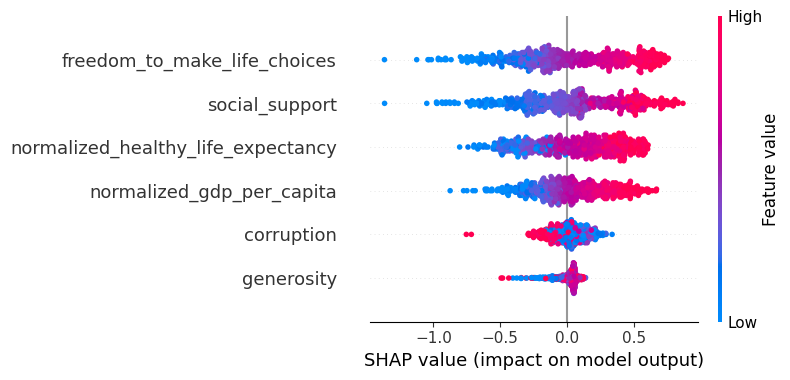

In [54]:
import shap

# Fit SVR model
best_svr.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(best_svr.predict, X_train)
shap_values = explainer(X_train)

# Plot summary
shap.summary_plot(shap_values, X_train)
